**Red Wine Quality** 
SAHANA R K

Dataset:
Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

Import Necessary Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [89]:
data=pd.read_csv('/content/winequality-red.csv')

In [90]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [91]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [92]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [94]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [95]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

*Both Regression and Classification algorithms can be tried.*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


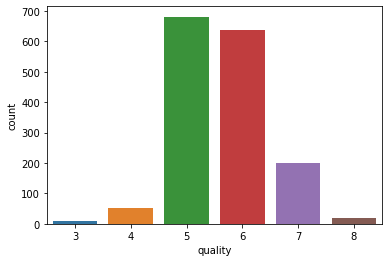

In [96]:
sb.countplot(data['quality'],label="Count") 

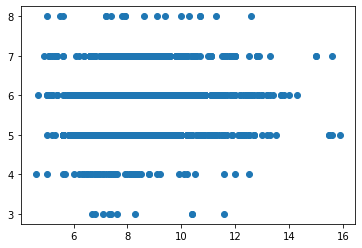

In [97]:
plt.scatter(data['fixed acidity'],data['quality'])

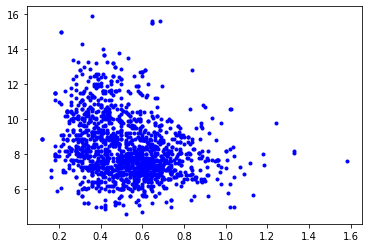

In [98]:
plt.plot(data['volatile acidity'],data['fixed acidity'],'b.')

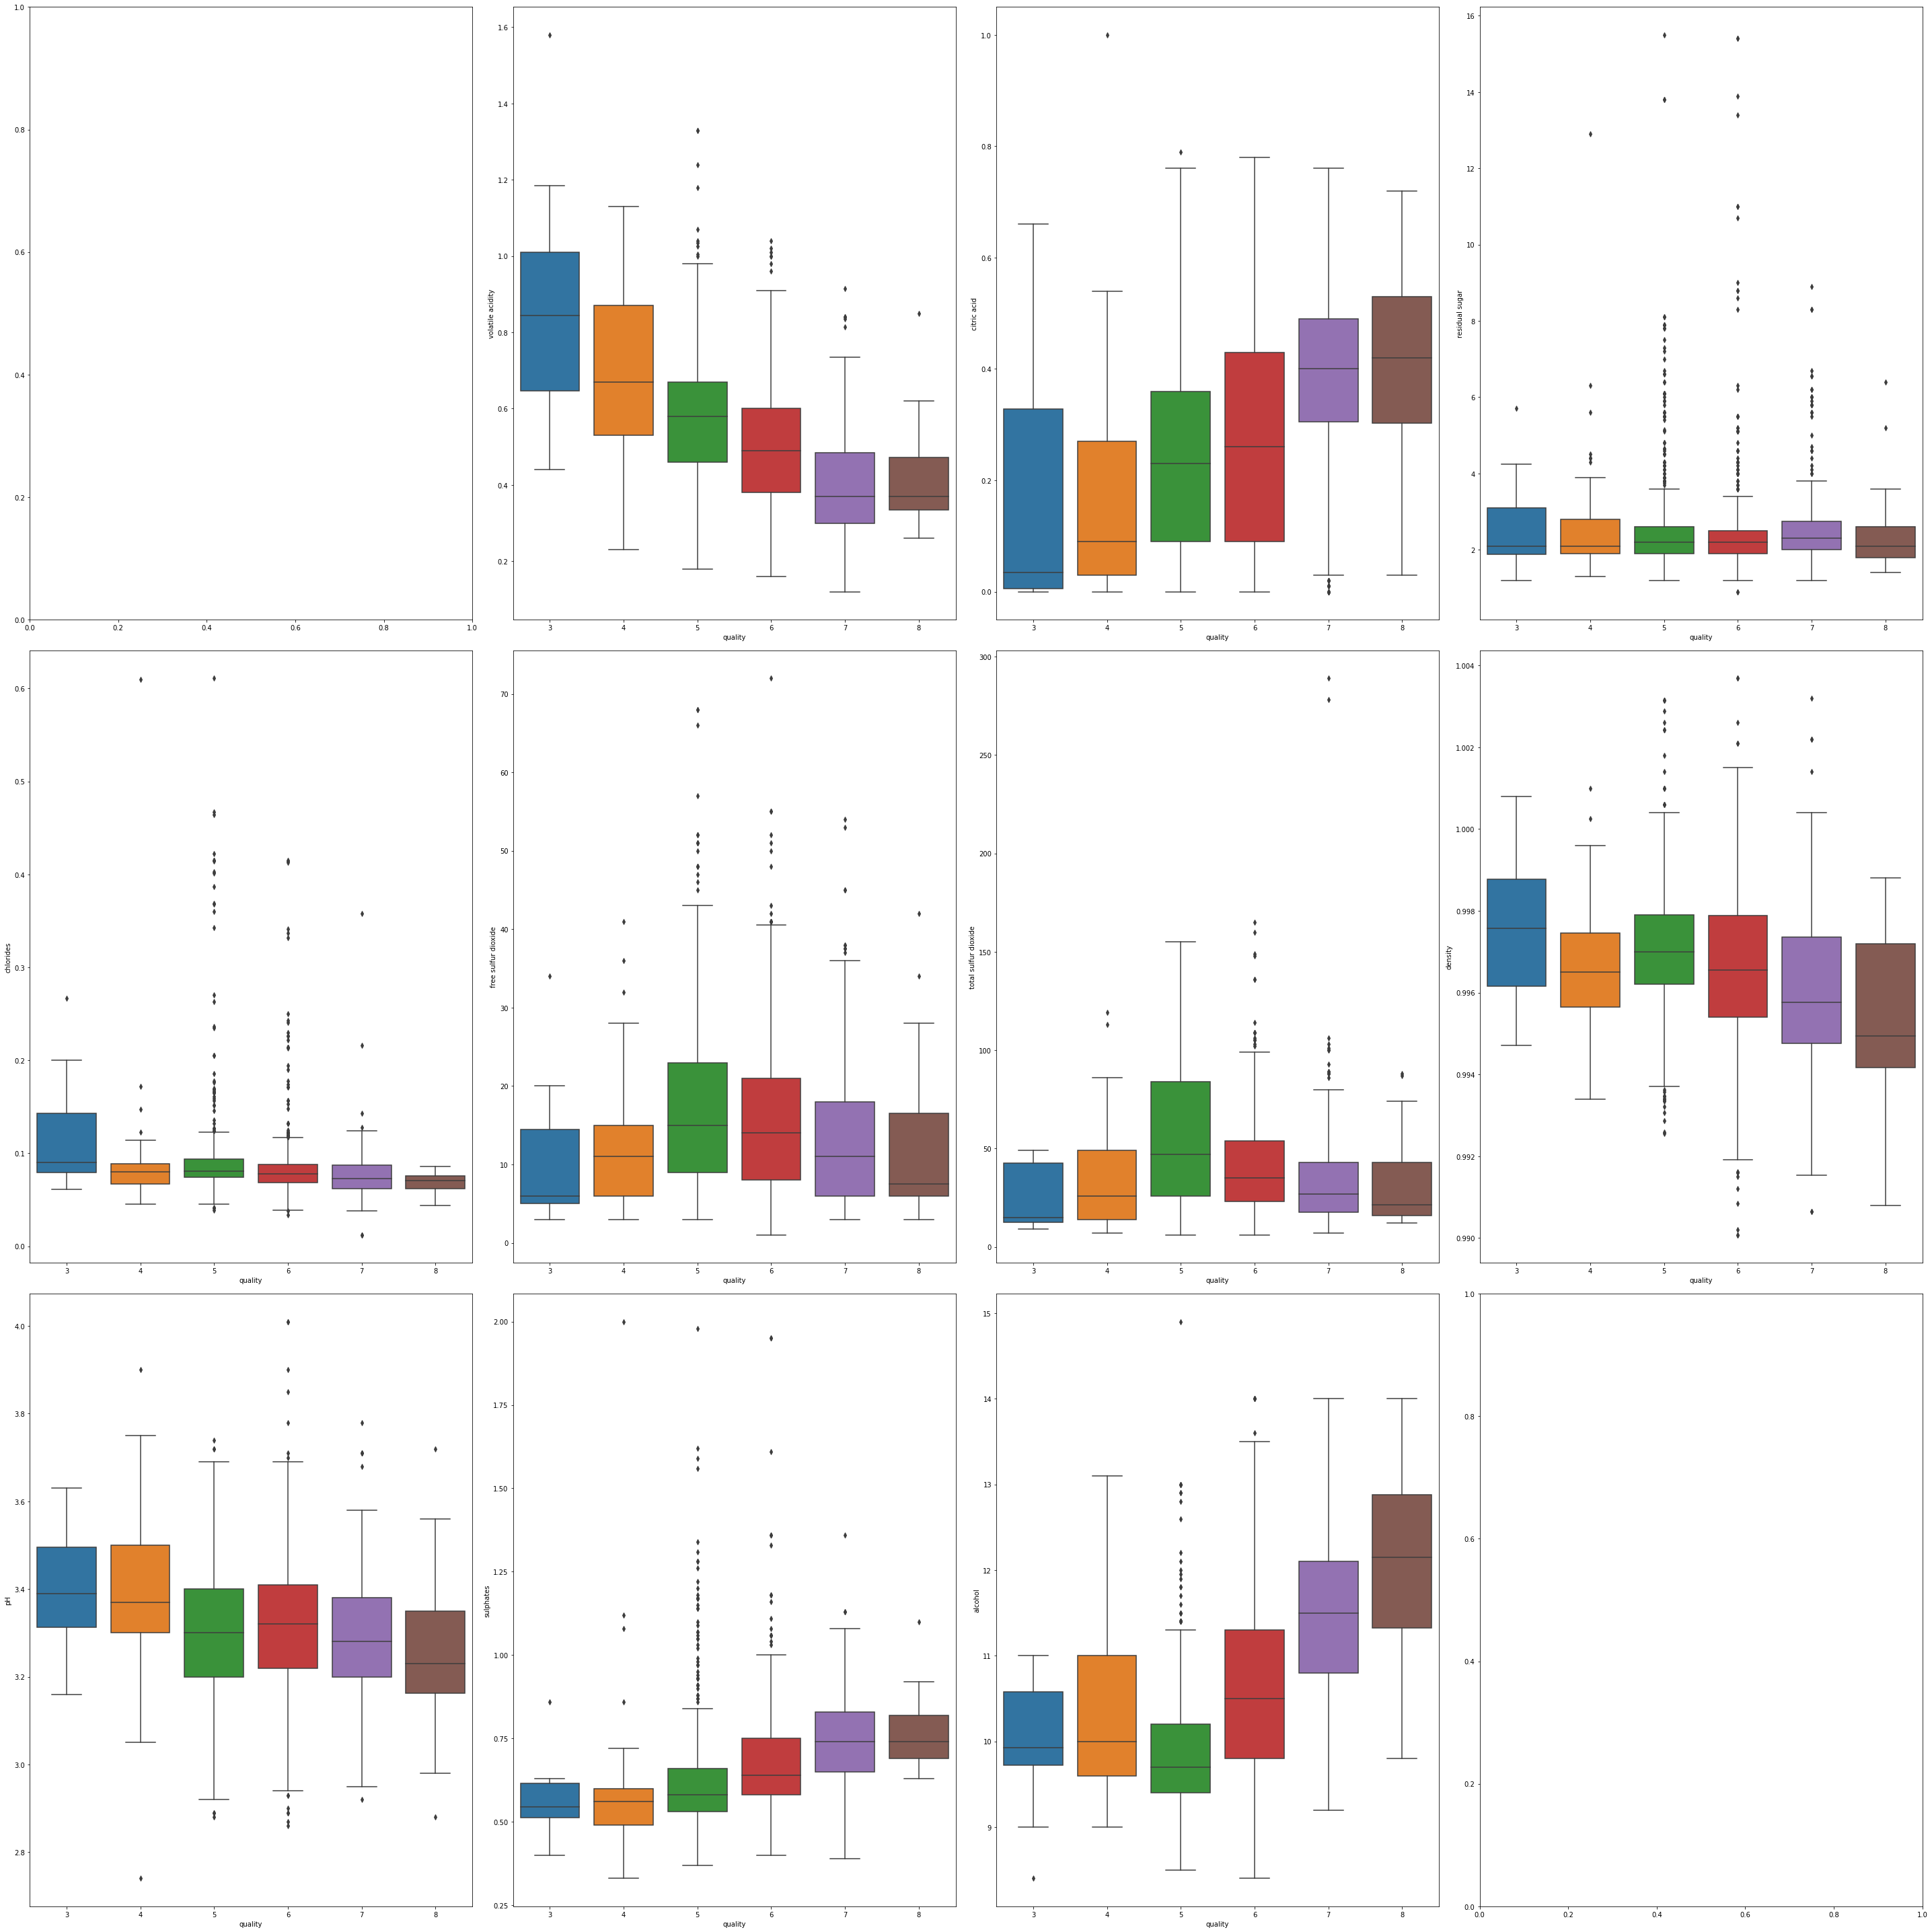

In [99]:
fig,axes=plt.subplots(3,4,figsize=(40,40))
axes=axes.flatten()

for i in range(1,len(data.columns)-1):
    sb.boxplot(x='quality',y=data.iloc[:,i],data=data,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()

In [100]:
x=data.iloc[:, :-1]

In [101]:
y=data.iloc[:,-1]

In [102]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [103]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

**Split the dataset for training and testing phase**

In [104]:
from sklearn.model_selection import train_test_split as tts

In [105]:
xtrain,xtest,ytrain,ytest=tts(x,y)

In [106]:
len(xtrain)

1199

In [187]:
xtrain

array([[-0.65403348,  0.56693156, -1.02922583, ...,  1.3050069 ,
        -0.68626558, -0.67912556],
       [-1.22924521,  0.53962355,  0.21356728, ...,  0.97940692,
         0.80567021, -1.06260542],
       [-1.05668169, -0.06115263, -0.82209365, ...,  0.19796696,
        -0.80562044, -1.06260542],
       ...,
       [ 1.30168639, -0.17038466,  0.93852992, ..., -0.518353  ,
         0.38792819,  0.47131402],
       [ 0.49638997, -0.55269678,  1.30101125, ...,  0.26308696,
        -0.26852356,  0.85479388],
       [-0.42394879, -0.66192881,  1.14566211, ...,  1.10964691,
        -0.08949126, -1.25434535]])

In [107]:
len(xtest)

400

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
sc=StandardScaler()

In [110]:
xtrain=sc.fit_transform(xtrain)

In [111]:
xtest=sc.fit_transform(xtest)

 **VARIOUS CLASSIFICATION ALGORITHMS ARE USED HERE**

ALGORITHM 1: LogisticRegression

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
lr=LogisticRegression()

In [114]:
lr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
pred1=lr.predict(xtest)

In [116]:
accuracy1=lr.score(xtest,ytest)

In [117]:
from sklearn.metrics import confusion_matrix

In [118]:
cm1=confusion_matrix(ytest,pred1)

In [119]:
print("The Accuracy Of Logistic Regression is {}".format(accuracy1))
print("Confusion Matrix of Logistic Regression is ")
print(cm1)

The Accuracy Of Logistic Regression is 0.6125
Confusion Matrix of Logistic Regression is 
[[  0   0   2   0   0   0]
 [  0   0   6   3   0   0]
 [  0   0 135  35   1   0]
 [  0   0  47  97  12   0]
 [  0   0   3  38  13   0]
 [  0   0   0   3   5   0]]


ALGORITHM 2: DecisionTreeClassifier

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
dt=DecisionTreeClassifier()

In [122]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [123]:
pred2=dt.predict(xtest)

In [124]:
accuracy2=dt.score(xtest,ytest)

In [125]:
cm2=confusion_matrix(ytest,pred2)

In [126]:
print("The Accuracy Of DecisionTreeClassifier is {}".format(accuracy2))
print("Confusion Matrix of DecisionTreeClassifieris ")
print(cm2)

The Accuracy Of DecisionTreeClassifier is 0.545
Confusion Matrix of DecisionTreeClassifieris 
[[  0   1   1   0   0   0]
 [  0   1   4   1   3   0]
 [  0   2 121  43   4   1]
 [  1   5  48  71  28   3]
 [  0   2   9  15  25   3]
 [  0   0   2   3   3   0]]


ALGORITHM 3: RANDOM FOREST Classifier





In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
rf=RandomForestClassifier()

In [129]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [130]:
pred3=rf.predict(xtest)

In [131]:
accuracy3=rf.score(xtest,ytest)

In [132]:
cm3=confusion_matrix(ytest,pred3)

In [133]:
print("The Accuracy Of RandomForestClassifier is {}".format(accuracy3))
print("Confusion Matrix of RandomForestClassifier is ")
print(cm3)

The Accuracy Of RandomForestClassifier is 0.7
Confusion Matrix of RandomForestClassifier is 
[[  0   0   2   0   0   0]
 [  0   0   7   2   0   0]
 [  0   0 142  29   0   0]
 [  0   1  34 113   8   0]
 [  0   0   2  26  25   1]
 [  0   0   0   4   4   0]]


ALGORITHM 4: K-Nearest Neighbor

In [134]:
from sklearn.neighbors import KNeighborsClassifier

In [135]:
kn=KNeighborsClassifier(n_neighbors=3)

In [136]:
kn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [137]:
pred4=kn.predict(xtest)

In [138]:
accuracy4=kn.score(xtest,ytest)

In [139]:
cm4=confusion_matrix(ytest,pred4)

In [140]:
print("The Accuracy Of KNeighborsClassifier is {}".format(accuracy4))
print("Confusion Matrix ofKNeighborsClassifier is ")
print(cm4)

The Accuracy Of KNeighborsClassifier is 0.5975
Confusion Matrix ofKNeighborsClassifier is 
[[  0   0   1   1   0   0]
 [  0   1   4   4   0   0]
 [  1   5 119  40   5   1]
 [  0   5  39  97  13   2]
 [  0   0  11  20  22   1]
 [  0   0   0   4   4   0]]


ALGORITHM 5:Support Vector Machine

In [141]:
from sklearn.svm import SVC

In [142]:
svc=SVC(kernel="linear")

In [143]:
svc.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [144]:
pred5=svc.predict(xtest)

In [145]:
accuracy5=svc.score(xtest,ytest)

In [146]:
cm5=confusion_matrix(ytest,pred5)

In [147]:
print("The Accuracy Of Support Vector Machine Classifier is {}".format(accuracy5))
print("Confusion Matrix of Support Vector MachineClassifier is ")
print(cm5)

The Accuracy Of Support Vector Machine Classifier is 0.5825
Confusion Matrix of Support Vector MachineClassifier is 
[[  0   0   2   0   0   0]
 [  0   0   6   3   0   0]
 [  1   0 130  40   0   0]
 [  0   0  53 103   0   0]
 [  0   0   3  51   0   0]
 [  0   0   0   8   0   0]]


THE ABOVE 5 CLASSIFICATION ALGORITHMS GIVES ACCURACY BELOW 50-70.
SO LETS TRY REGRESSION ALORITHM

ALGORITHM 6: Linear Regression


In [148]:
from sklearn.linear_model import LinearRegression

In [149]:
lin_r= LinearRegression()

In [150]:
lin_r.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
pred6=lin_r.predict(xtest)

In [152]:
accuracy6=lin_r.score(xtest,ytest)

In [153]:
print("Accuracy of LinearRegression {} ".format(accuracy6))

Accuracy of LinearRegression 0.38308457756656467 


ALGORITHM 7: RANDOM FOREST Regressor


In [154]:
from sklearn.ensemble import RandomForestRegressor

In [155]:
rfr= RandomForestRegressor()

In [156]:
rfr.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [157]:
pred7=rfr.predict(xtest)

In [158]:
accuracy7=rfr.score(xtest,ytest)

In [159]:
print("Accuracy of RandomForestRegressor {} ".format(accuracy7))

Accuracy of RandomForestRegressor 0.5063130314870145 


ALGORITHM 8: DecisionTreeRegressor

In [160]:
from sklearn.tree import DecisionTreeRegressor

In [161]:
dtr=DecisionTreeRegressor()

In [162]:
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [163]:
pred8=dtr.predict(xtest)

In [164]:
accuracy8=dtr.score(xtest,ytest)

In [166]:
print("Accuracy of DecisionTreeRegressor {} ".format(accuracy8))

Accuracy of DecisionTreeRegressor 0.1578947368421053 


ALGORITHM 9:Support Vector Machine Regressor

In [167]:
from sklearn.svm import SVR

In [168]:
svr=SVR(kernel="linear")

In [169]:
svr.fit(xtrain,ytrain)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [170]:
pred9=svr.predict(xtest)

In [171]:
accuracy9=svr.score(xtest,ytest)

In [172]:
print("Accuracy of Support Vector Machine Regressor {} ".format(accuracy9))

Accuracy of Support Vector Machine Regressor 0.4032696669735477 


Regression Algorithms dont yield good accuracy.
So, I conclude saying that for this dataset classification algorithms are more suitable

ALGOTHIMS 10:AdaBoostClassifier

In [173]:
from sklearn.ensemble import AdaBoostClassifier

In [174]:
ad=AdaBoostClassifier()

In [175]:
ad.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [176]:
pred10=ad.predict(xtest)

In [177]:
accuracy10=ad.score(xtest,ytest)

In [178]:
cm10=confusion_matrix(ytest,pred10)

In [179]:
print("The Accuracy Of AdaBoostClassifier is {}".format(accuracy10))
print("Confusion Matrix of AdaBoostClassifier is ")
print(cm10)

The Accuracy Of AdaBoostClassifier is 0.575
Confusion Matrix of AdaBoostClassifier is 
[[  0   0   2   0   0   0]
 [  0   0   6   3   0   0]
 [  0   0 128  43   0   0]
 [  0   0  51 102   0   3]
 [  0   0   6  48   0   0]
 [  0   0   0   8   0   0]]


In [183]:
algorithm=['Logistic_reression','Decison Tree Classifier','RandomForestClassifier','KNN','SVM classifier','linear_regression','Random_Regressor','Decison tree Regressor','SVM Regressor','AdaBoost']
accuracy_of_models= [accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7,accuracy8,accuracy9,accuracy10]

In [186]:
for a in accuracy_of_models:
  print("ACCURACY {}".format(a*100))

ACCURACY 61.25000000000001
ACCURACY 54.50000000000001
ACCURACY 70.0
ACCURACY 59.75
ACCURACY 58.25
ACCURACY 38.308457756656466
ACCURACY 50.63130314870145
ACCURACY 15.789473684210531
ACCURACY 40.32696669735477
ACCURACY 57.49999999999999


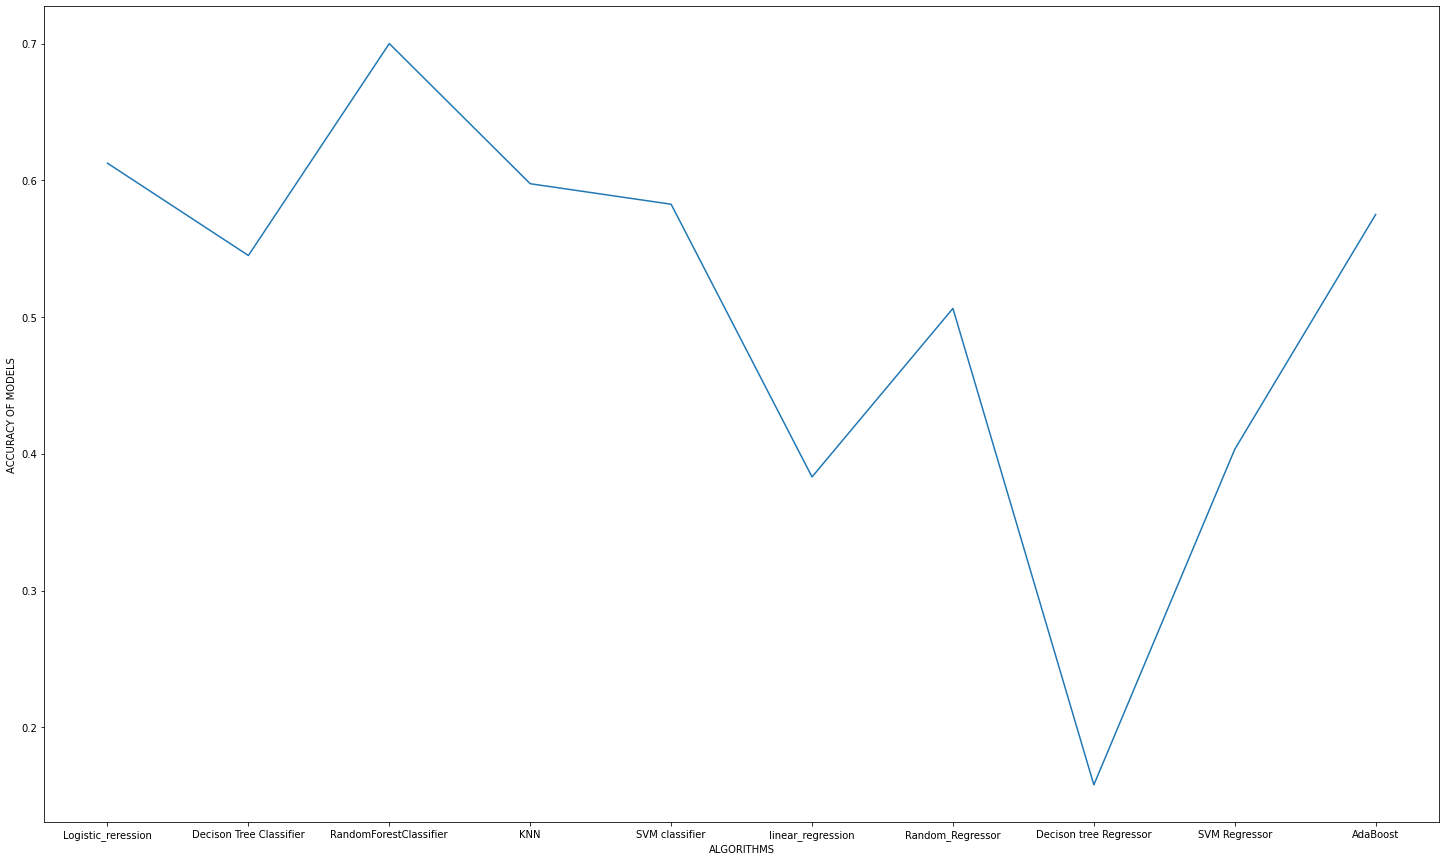

In [184]:
plt.figure(figsize=(25, 15))
plt.plot(algorithm,accuracy_of_models)
plt.ylabel('ACCURACY OF MODELS')
plt.xlabel('ALGORITHMS')
plt.show()


 **FROM THE ABOVE GRAPH PLOT ,I DERIVE AN CONCLUSION WHICH SAYS THE "RANDOM FOREST CLASSIFIER GIVES THE HIGHEST ACCURACY FOR THE RED WINE QUALITY DATASET =70% AND DECISION TREE REGRESSOR GIVES THE LEAST ACCURACY **